**INTRODUCTION**

**"What are the factors leading to increase in employees performance?"**

**"Why most of the experienced employees are leaving the company?”**

The natural decline in number of employees and not being replaced is referred as attrition.
After a certain threshold, attrition can make a big dent in company's bottom line as well as its culture.It is vital to take these trends with a grain of salt and deep-dive into our data for most relevant metrics.In this primer,we are performing an indepth analysis to understand important factors and make accurate predictions.


**The simulated data set comprises of many factors such as age,Experience,Worklife balance,Workinghours and many more**

**DATA PREPARATION AND CLEANING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
emp_data= pd.read_csv('Employee-Attrition.csv')
emp_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023+,Sales,2.0,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#list of columns
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
emp_data.set_index('EmployeeNumber',inplace=True)


In [7]:
emp_data.index

Int64Index([   1,    2,    4,    5,    7,    8,   10,   11,   12,   13,
            ...
            2054, 2055, 2056, 2057, 2060, 2061, 2062, 2064, 2065, 2068],
           dtype='int64', name='EmployeeNumber', length=1470)

In [8]:
#list of characters to remove
chars_to_remove = [',','$','+']
# list of column names to clean
cols_to_clean = ['MonthlyIncome','DailyRate']

# Loop for each column
for col in cols_to_clean:
    #Replace each character with an empty string
    for char in chars_to_remove:
        emp_data[col] = emp_data[col].astype(str).str.replace(char,'')
    #Convert col to numeric
    emp_data[col] = pd.to_numeric(emp_data[col])

In [9]:
emp_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23.0,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6.0,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4.0,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


**EXPLORATORY ANALYSIS AND VISUALIZATION**

In [10]:
emp_data.isnull().sum()

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             5
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                  83
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              6
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSin

**There are some null values in the dataset.**

In [11]:
emp_data.shape

(1470, 34)

**The dataset contains 35 columns and 1470 columns**

In [12]:
emp_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1465.000000,1470.000000,1470.0,1470.000000,1387.000000,1470.000000,1470.000000,1464.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.190444,2.912925,1.0,2.721769,66.000000,2.729932,2.063946,2.724727,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.112253,1.024165,0.0,1.093082,20.242897,0.711561,1.106940,1.103051,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1465 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1387 non-null   float64
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [14]:
emp_data.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

**These are the categorical columns in the dataset.**

In [15]:
emp_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [31]:
#Let's encode the attrition column so we can use it for EDA
emp_data['Attrition']= emp_data['Attrition'].factorize(['NO','YES'])[0]
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


**Attrition: NO = 0  YES = 1**

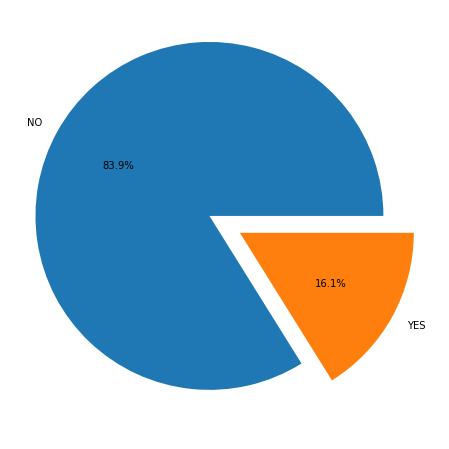

In [16]:
plt.figure(figsize=(8,8))
pie = emp_data.groupby('Attrition')['Attrition'].count()
plt.pie(pie,explode=[0.1,0.1],labels= ['NO','YES'],autopct='%1.1f%%');

**84% of the employees in the dataset have not left the company**

In [17]:
emp_data.select_dtypes(include=['int64']).dtypes

Age                         int64
DailyRate                   int64
Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

**All the columns are numeric.**

<AxesSubplot:xlabel='Age', ylabel='Density'>

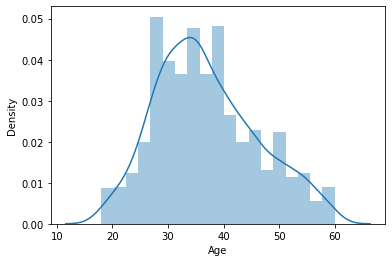

In [18]:
sns.distplot(emp_data["Age"])

In [19]:
emp_data[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [20]:
emp_data[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

**Most employees in their 30s with 35 year olds are having the highest count and lowest are at around the age 60 or less than 20.**

In [21]:
emp_data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [22]:
emp_data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<AxesSubplot:>

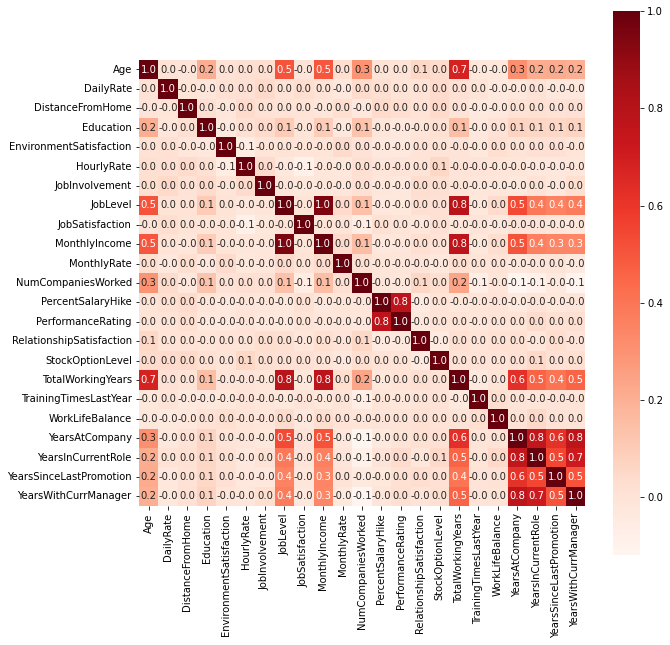

In [23]:
# heatmap to check correlation between the variables.
emp_data = emp_data.drop(['EmployeeCount','StandardHours'], axis=1)
# dropping above two columns because they only have one value
corr = emp_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

 **As we can see, there isn't a very strong correlation of the target column with any of the numerical columns. But we can see other correlations such as:
1)Majority of senior employees have higher total working years(very obvious).
2)Higher performance ratings lead to increase in salary hike percentage.
3)The monthly income increases as the number of years of an employee in the company increases.
4)A lot of employees remain in their current role and also under the same manager as years pass by as they don't get promoted    and this could be a major factor contributing to attrition.
From here, we can deduct that the lack of promotions may be a crucial factor to attritions.**

<AxesSubplot:xlabel='YearsAtCompany'>

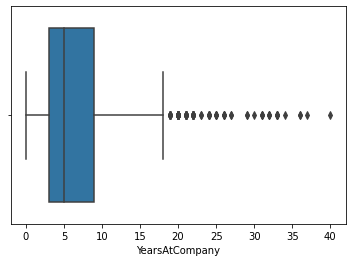

In [24]:
sns.boxplot(emp_data["YearsAtCompany"])

**Most employees remain in the company for 3-9 years with median being 5 years.**

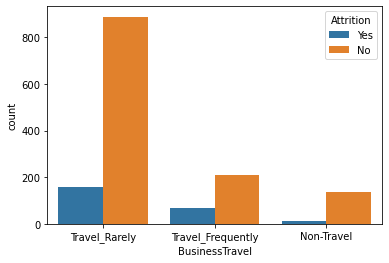

In [25]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=emp_data);

**Most employees who travel rarely don't leave the company. From the plot we can conclude, sending employees on business travels or not doesn't really make much difference and doesn't effect significantly on attrition.**

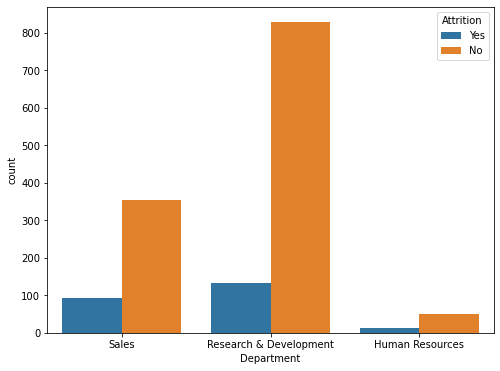

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=emp_data);

In [27]:
emp_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

**Most attritions are from the research & development department itself for sales department to come second by a small margin. Human resources has the least number of attritions. Noted that R&D has a lot more employees than sales and HR.
Considering percentage of attritions per department, we would observe that the HR department has most attritions.**

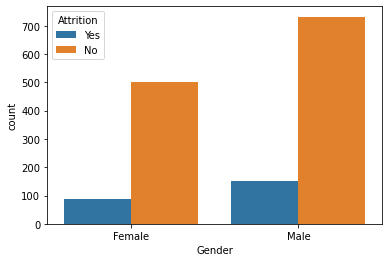

In [28]:
sns.countplot(x='Gender', hue='Attrition', data=emp_data);

**Clearly males count is greater than females in the organisation.Hence attritions slightly high. Eventhough gender is not a significant factor behind attritions.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

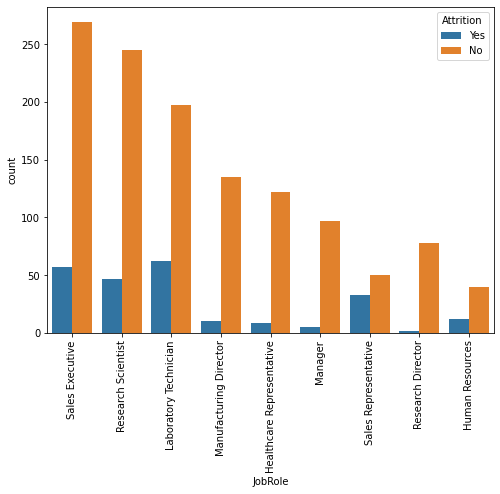

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=emp_data);
plt.xticks(rotation=90)

**Among job roles, most laboratory technicians have departed from their jobs,for research scientists, sales executives and sales representatives (% wise) to trail behind. We could look into salaries of each job roles and see if that may be the reason.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

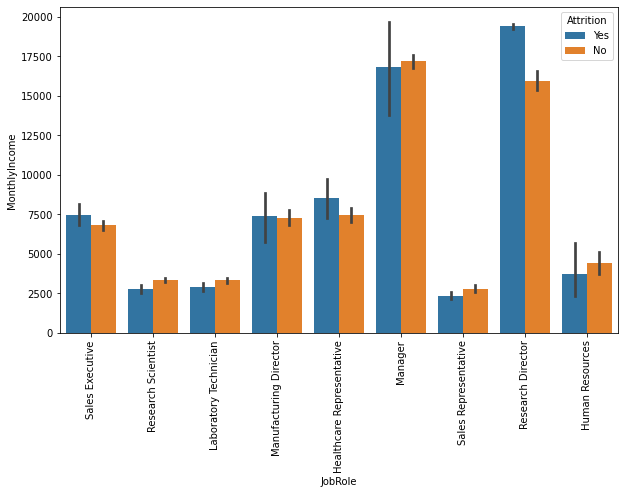

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=emp_data)
plt.xticks(rotation=90)

**As doubted, laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.
Also, as we had seen earlier, the HR department had the most attritions and we can see they have very low salaries as well.**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

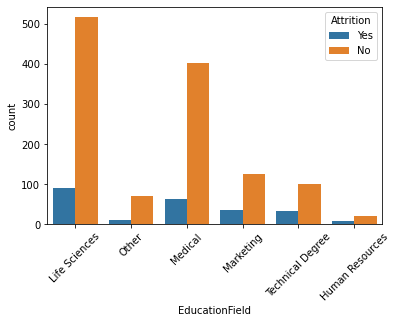

In [31]:
sns.countplot(x='EducationField', hue='Attrition', data=emp_data);
plt.xticks(rotation=45)

**Clearly the degrees of employees really dont matter as most of the number of attritions are similar.**

<AxesSubplot:xlabel='OverTime', ylabel='count'>

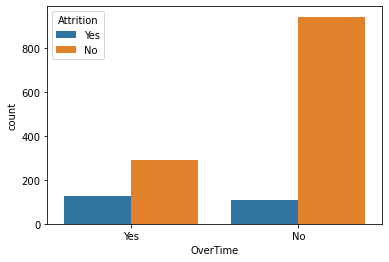

In [32]:
sns.countplot(x='OverTime', hue='Attrition', data=emp_data)

**Overtime hours aren't a very crucial factor either.**

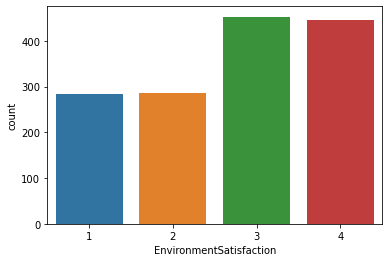

In [33]:
sns.countplot(x='EnvironmentSatisfaction', data=emp_data);

**Most employees seem to be satisfied with the working environment.**

**CONCLUSION**

**The following are the conclusions drawn:**

1)84% of the employees have not left the company.
2)Maximum age group of the employees is around 35 and minimum at around the age 60 or less than 20.
3)Higher performance ratings lead to increase in salary hike percentage.
3)The monthly income increases as the number of years of an employee in the company increases.
4)A lot of employees remain in their current role and also under the same manager as years pass by as they don't get promoted and this could be a major factor contributing to attrition.
5)The employee's experience is around 3-9yrs median being 5 yrs.
6)Employee's gender,degree,business travel and overtime hours donot contribute to major difference in attrition.
7)Most attritions are from the research & development department itself for sales department to come second by a small margin. Human resources has the least number of attritions. Noted that R&D has a lot more employees than sales and HR. Considering percentage of attritions per department, we would observe that the HR department has most attritions.
8)Among job roles, most laboratory technicians have departed from their jobs  
9)As doubted, laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.
10)Most of the employees are contented and satisfied with the working environment.

**Therefore, we can deduct that the lack of promotions may be a crucial factor to attrition.Also in the 
positions with comparitively lower salaries,the attrition rate is high.Employees expecting a resonable or
hike in their pay/salary worth their efforts and hoping for a growth in their career mainly lead to attrition in employees.**